In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [2]:
#a)

x = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 
#Your code:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.1)

model.fit(X_train, y_train)

#Hint: .fit()

LinearRegression()

Mean squared error equals: 321399675303.3307


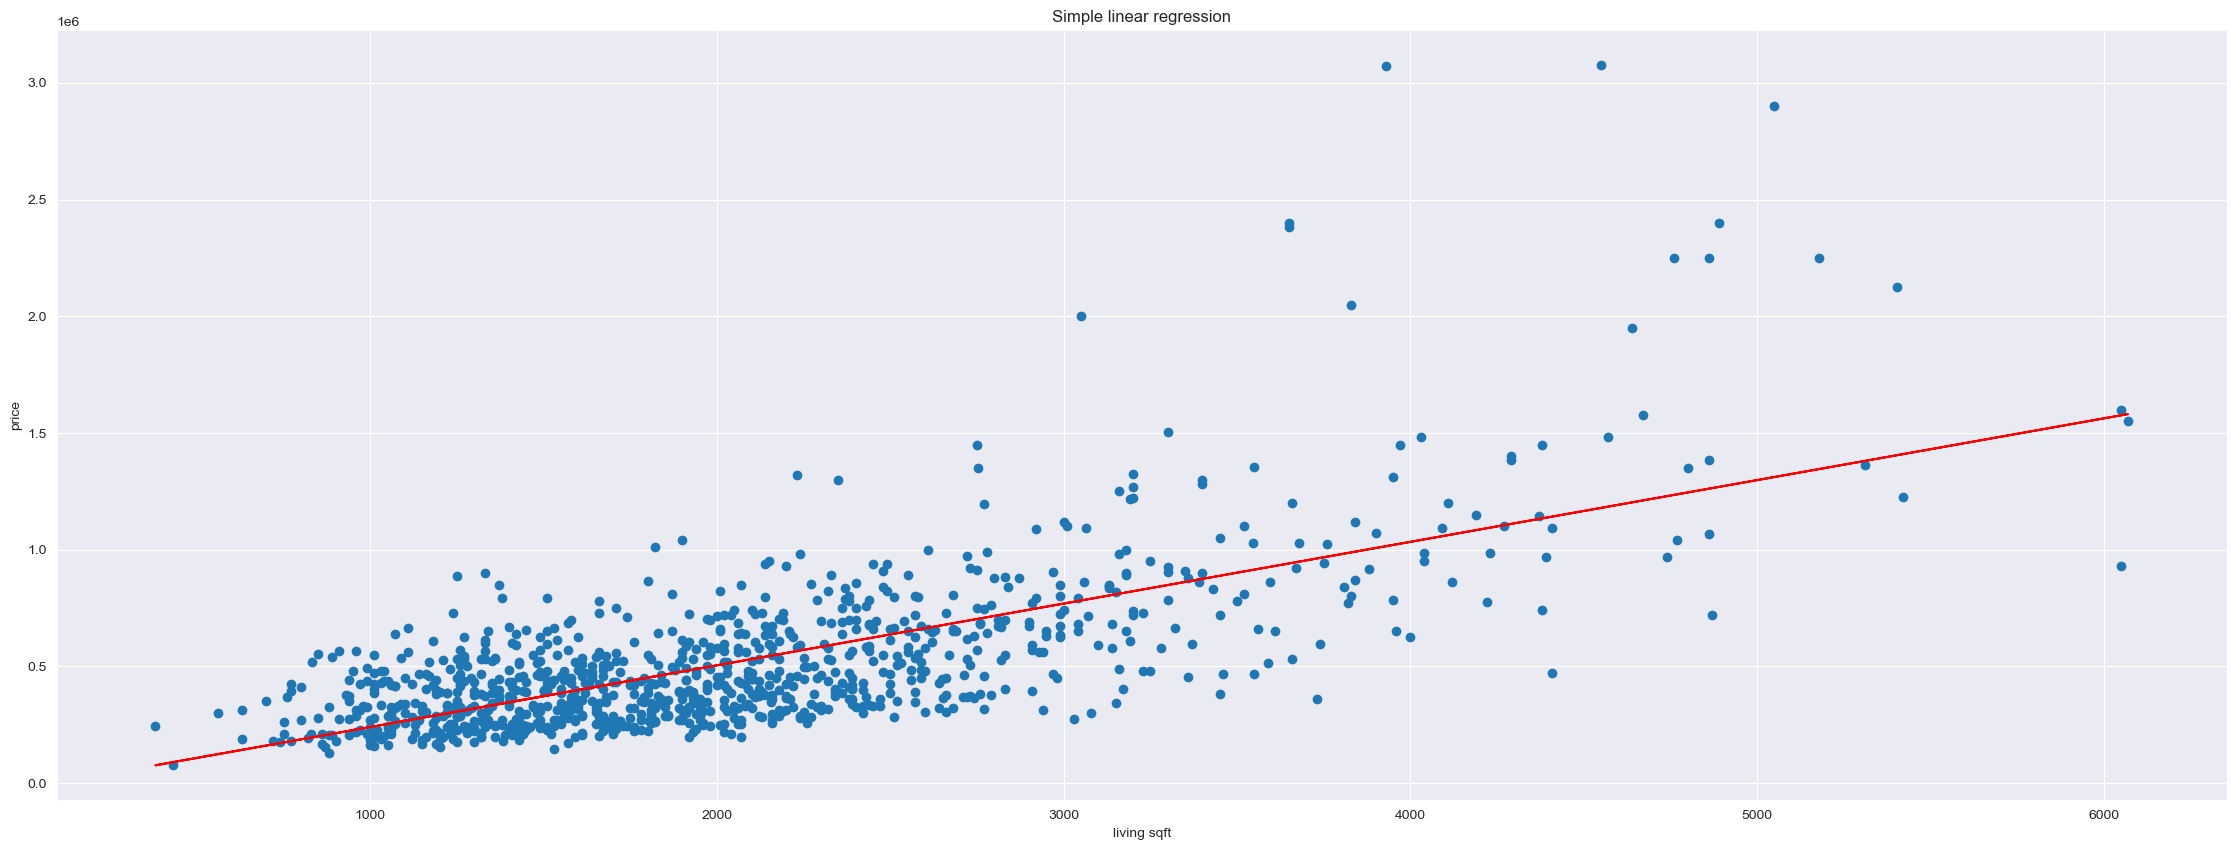

In [10]:
#b)
#Your code:
fig = plt.figure()
fig.set_figwidth(28)
fig.set_figheight(10)

plt.xlabel("living sqft")
plt.ylabel("price")
plt.plot(x, (x * model.coef_ + model.intercept_),"r")
plt.scatter(x,y)
#plt.xlim(0,max(x)*1.2)
#plt.ylim(0,max(y)*1.2)

plt.title("Simple linear regression")
print('Mean squared error equals:',mean_squared_error(x, (x*model.coef_+model.intercept_)))

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

## Comment
The line is fitted quite efficient, but there are a lot of outliers on the plot which they w disturb modeling the line better. What is more the mean squared error is big which is bad for the model. We need to remember that the price of the house depends on the many variables such as location, number of bedrooms and etc.

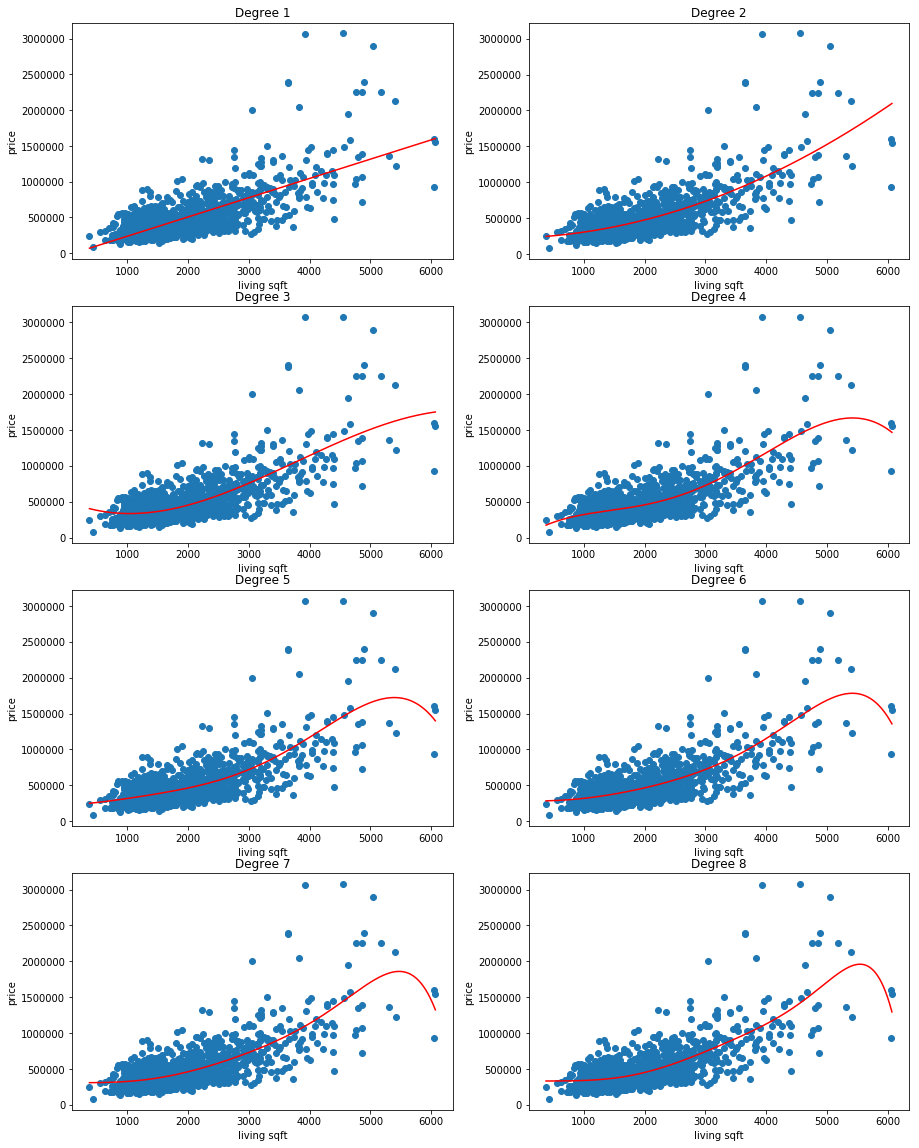

In [4]:
#c)

for order in range(1,9):
    
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(x)
    
    #Your code:


## Comment


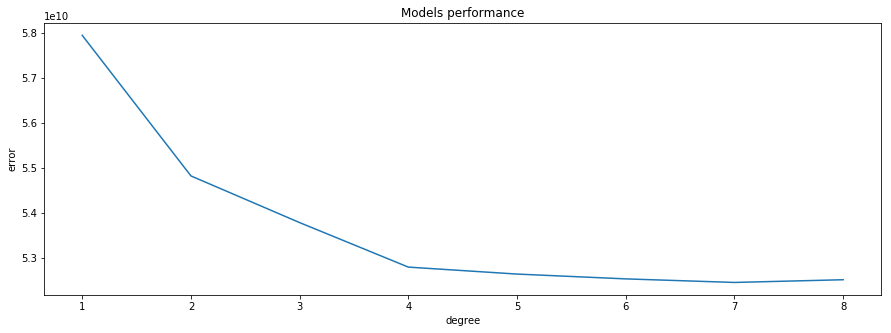

In [5]:
#Your code:
degree=[1,2,3,4,5,6,7,8]
fig=plt.figure(figsize = (18,11))
plt.plot(degree,mean)

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

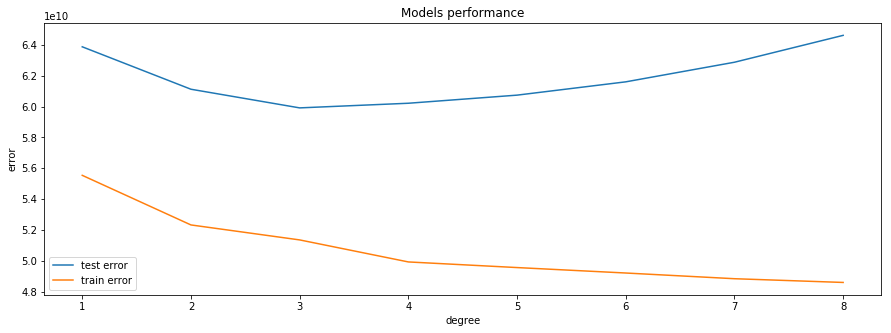

In [6]:
#a)

for order in range(1,9):
    
    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)
    
    ...

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

Mean squared error equals: 396407.1889615157


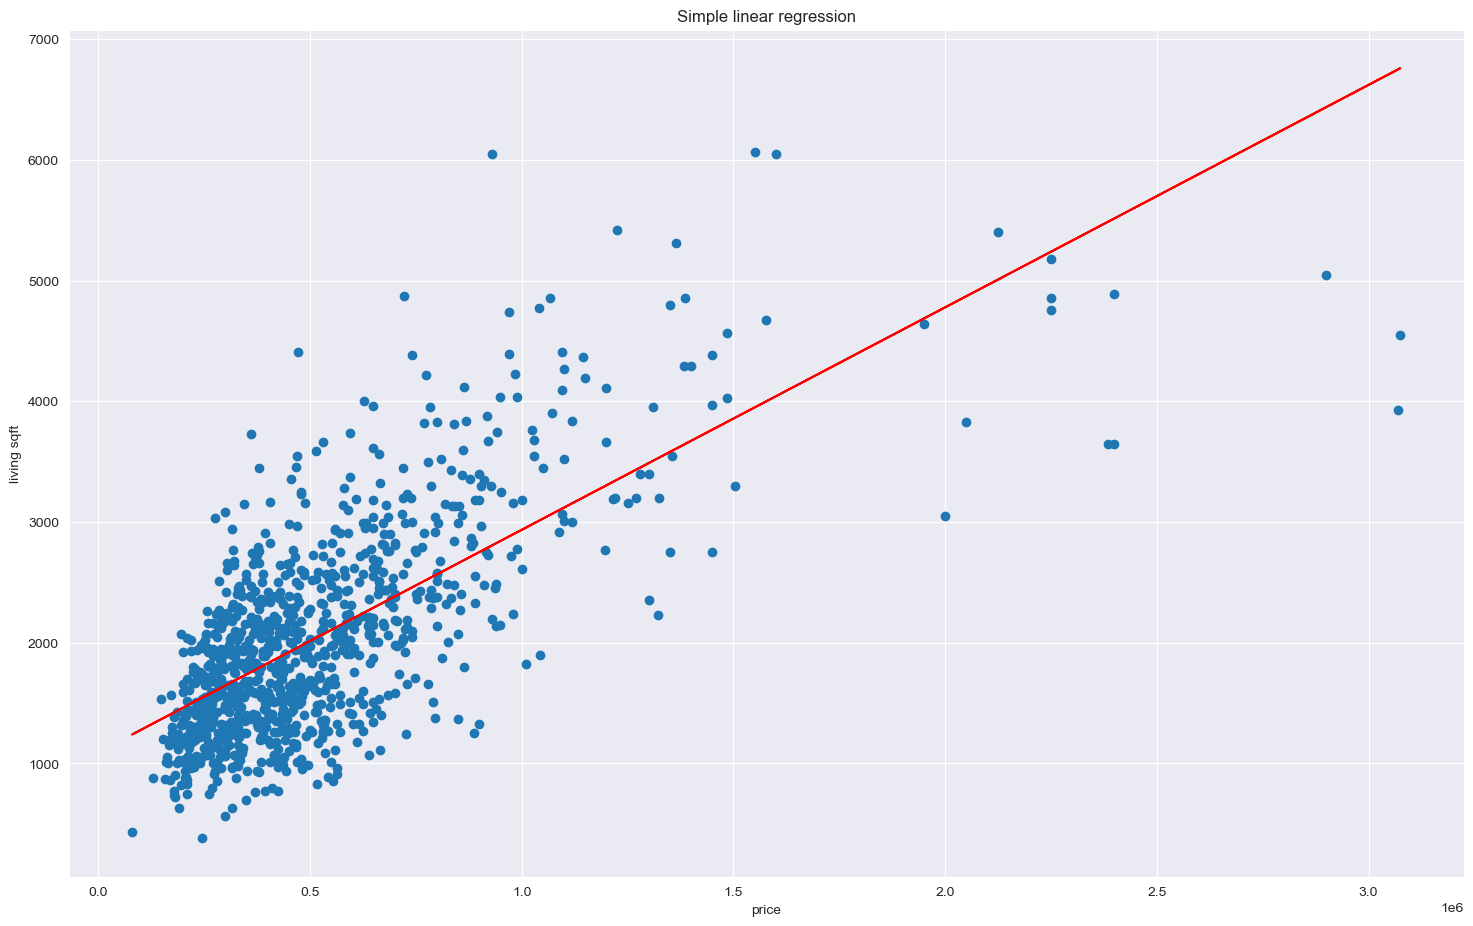

In [13]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

#Your code:
model=LinearRegression()
model.fit(X, y)
fig=plt.figure(figsize = (18,11))
plt.scatter(X,y)
plt.plot(X,model.predict(X),'r')
plt.title("Simple linear regression")
plt.xlabel("price")
plt.ylabel("living sqft")
print('Mean squared error equals:',mean_squared_error(y, (X*model.coef_+model.intercept_)))


In [8]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)
    
model = LinearRegression() 
_= model.fit(X_train, y_train) 

y_pred = model.predict(X_test)
print("Mean squared error equals: {0}".format(mean_squared_error(y_pred, y_test)))


#Your model:


Mean squared error equals: 48749900202.864044
